## Exploratory Data Analysis -
- Missing Values and Null Values
- Univariate Analysis
- Relationship Between Variables


In [4]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import statsmodels as sm

In [5]:
# Load the dataset

df = pd.read_csv("BlackFriday/train.csv")

In [6]:
# Shape of the dataset
df.shape

(550068, 12)

In [7]:
# columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
# Data types information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
# Lets looks at sample data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Missing values

In [17]:
pd.concat([df.isnull().sum(),np.round(df.isnull().mean()*100,2)],axis=1).reset_index().rename(columns={0:"Missing #",1:"Missing %"})

,index,Missing #,Missing %
0,User_ID,0,0.00
1,Product_ID,0,0.00
2,Gender,0,0.00
3,Age,0,0.00
4,Occupation,0,0.00
5,City_Category,0,0.00
6,Stay_In_Current_City_Years,0,0.00
7,Marital_Status,0,0.00
8,Product_Category_1,0,0.00
9,Product_Category_2,173638,31.57


<AxesSubplot:>

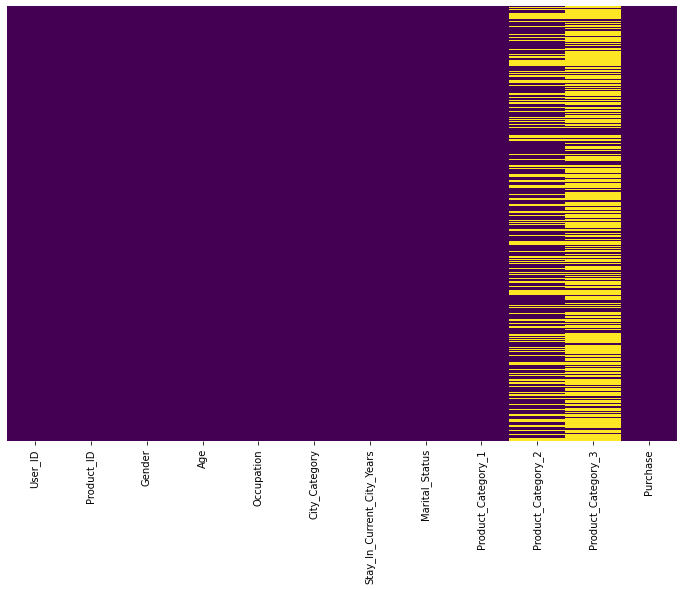

In [165]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Observations - 

- Product category 2 has 31% missing values,if we delete the variable we may loose information.. As this is a Descrete variable we will replace the na's with Mode

- Product Category 3 has 70% missing values, we can discard this variable

In [28]:
# Numerical vaiables stata
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [29]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


## Univariate Analysis

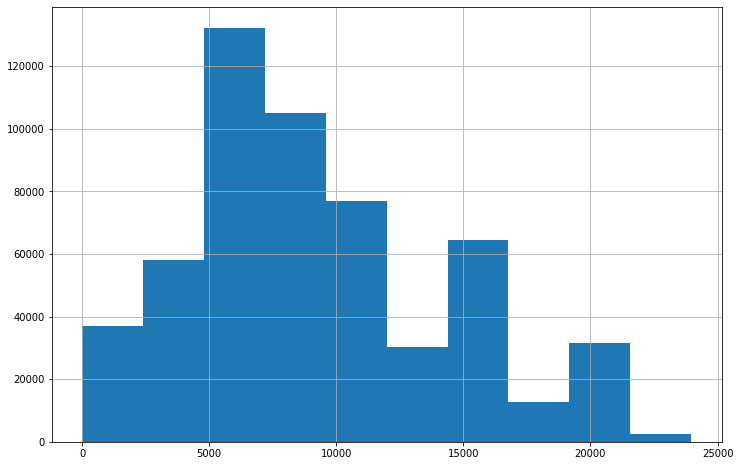

In [20]:
## Purchase 
## For Continuous Variables: To see the distribution of data we create Box plots and Histograms.

plt.hist(df["Purchase"])
plt.grid(True)

# df.Purchase.hist()
# df.Purchase.plot(kind='hist' , grid = True)


<AxesSubplot:>

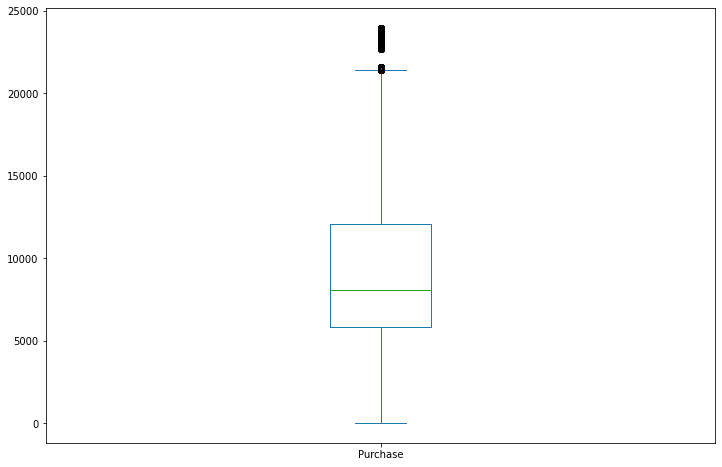

In [22]:
df.Purchase.plot(kind='box')

In [140]:
# User purchases distribution
df_user_purchases = df['User_ID'].value_counts().reset_index().rename(columns={"index":"User","User_ID":"# of Purchases"})
df_user_purchases["Buckets"] = df_user_purchases["# of Purchases"]//100*100

In [141]:
user_buckets = df_user_purchases.groupby(["Buckets"]).size().reset_index().rename(columns={0:"Users"})
user_buckets["Buckets"] = user_buckets["Buckets"].astype(str).replace(".0","")+"-"+(user_buckets["Buckets"]+100).astype(str)

In [143]:
user_buckets

,Buckets,Users
0,0-100,4153
1,100-200,1010
2,200-300,405
3,300-400,160
4,400-500,103
5,500-600,32
6,600-700,14
7,700-800,9
8,800-900,3
9,900-1000,1


<AxesSubplot:xlabel='Buckets', ylabel='Users'>

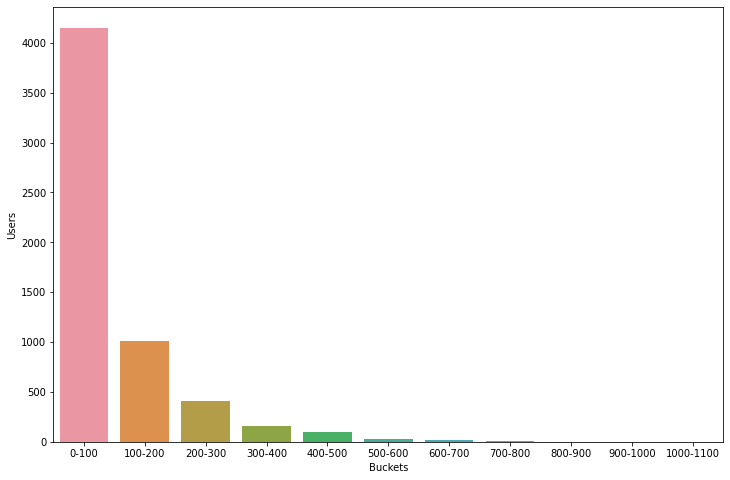

In [144]:
sns.barplot(x="Buckets",y="Users",data=user_buckets)

# Gender & Age Analysis

In [172]:
df_age_orders = df.groupby(["Gender","Age"]).size().reset_index().rename(columns={0:"orders"})
df_age_orders

,Gender,Age,orders
0,F,0-17,5083
1,F,18-25,24628
2,F,26-35,50752
3,F,36-45,27170
4,F,46-50,13199
5,F,51-55,9894
6,F,55+,5083
7,M,0-17,10019
8,M,18-25,75032
9,M,26-35,168835


<AxesSubplot:xlabel='Age', ylabel='orders'>

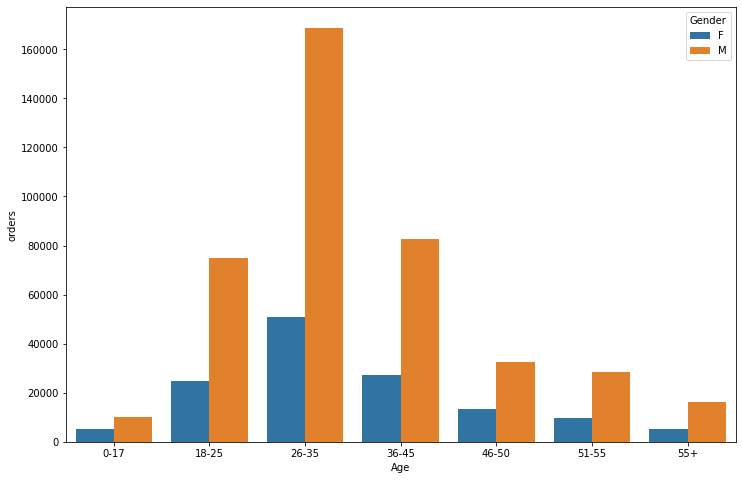

In [173]:
sns.barplot(x="Age",y="orders", hue="Gender",data=df_age_orders)

In [187]:
df_age_purchasevalue = df.groupby(["Gender","Age"])["Purchase"].sum().reset_index()
df_age_purchasevalue

,Gender,Age,Purchase
0,F,0-17,42385978
1,F,18-25,205475842
2,F,26-35,442976233
3,F,36-45,243438963
4,F,46-50,116706864
5,F,51-55,89465997
6,F,55+,45782765
7,M,0-17,92527205
8,M,18-25,708372833
9,M,26-35,1588794345


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

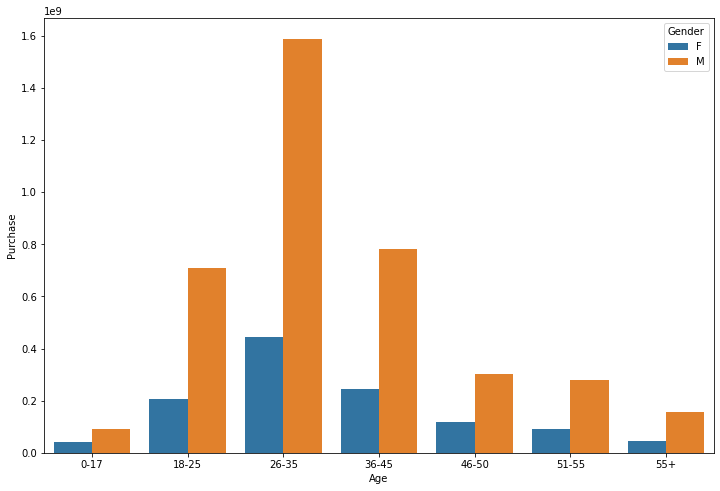

In [188]:
sns.barplot(x="Age",y="Purchase", hue="Gender",data=df_age_purchasevalue)

In [190]:
df_age_purchase_avgs = df.groupby(["Gender","Age"])["Purchase"].mean().reset_index()
df_age_purchase_avgs

,Gender,Age,Purchase
0,F,0-17,8338.771985
1,F,18-25,8343.180201
2,F,26-35,8728.251754
3,F,36-45,8959.844056
4,F,46-50,8842.098947
5,F,51-55,9042.449666
6,F,55+,9007.036199
7,M,0-17,9235.173670
8,M,18-25,9440.942971
9,M,26-35,9410.337578


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

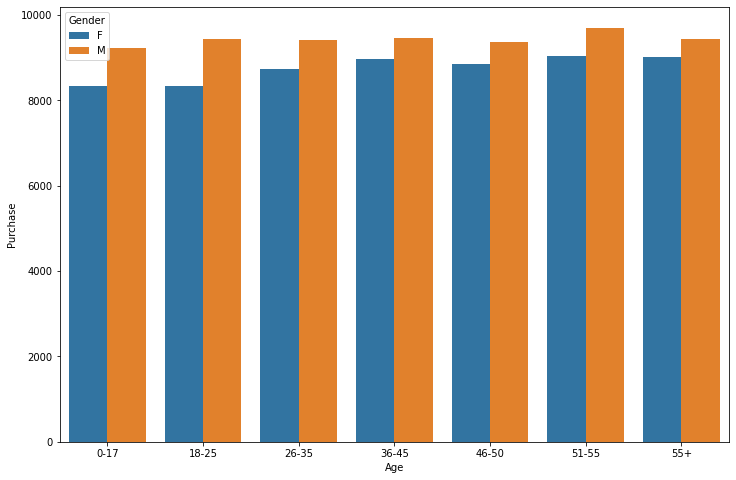

In [191]:
sns.barplot(x="Age",y="Purchase", hue="Gender",data=df_age_purchase_avgs)

# Gender & Occupation Analysis

In [202]:
df_Occupation_orders = df.groupby(["Gender","Occupation"]).size().reset_index().rename(columns={0:"orders"})
df_Occupation_purchasevalue = df.groupby(["Gender","Occupation"])["Purchase"].sum().reset_index()
df_Occupation_purchase_avgs = df.groupby(["Occupation","Gender"])["Purchase"].mean().reset_index()

# sns.pairplot(df)

<AxesSubplot:xlabel='Occupation', ylabel='orders'>

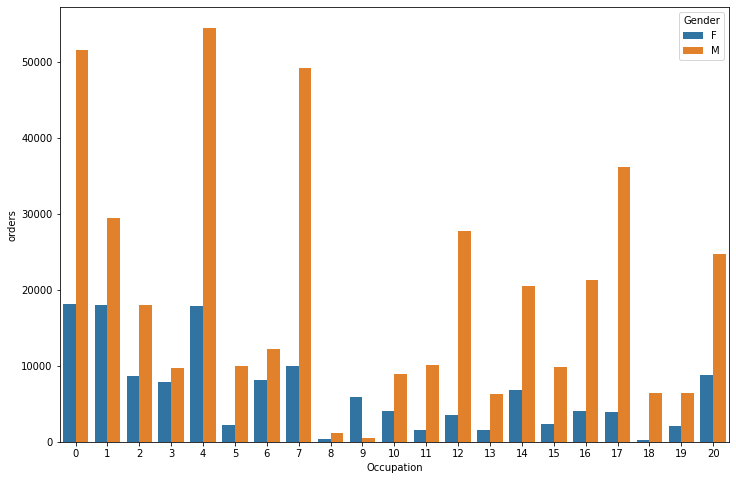

In [203]:
sns.barplot(x="Occupation",y="orders", hue="Gender",data=df_Occupation_orders)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

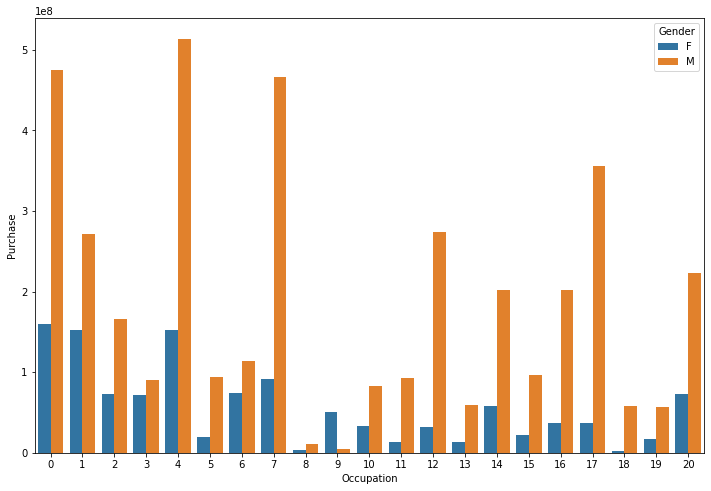

In [204]:
sns.barplot(x="Occupation",y="Purchase", hue="Gender",data=df_Occupation_purchasevalue)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

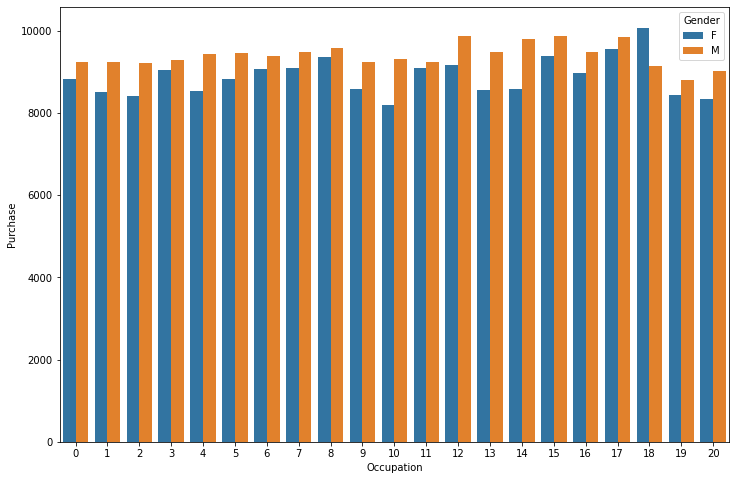

In [205]:
sns.barplot(x="Occupation",y="Purchase", hue="Gender",data=df_Occupation_purchase_avgs)

In [234]:
df_gender_marital_Status = pd.concat([df.groupby(["Gender","Marital_Status"]).size().reset_index().rename(columns={0:"Orders"}),\
                        df.groupby(["Gender","Marital_Status"])["Purchase"].sum().reset_index().rename(columns={"Purchase":"Total"})["Total"], \
                        df.groupby(["Gender","Marital_Status"])["Purchase"].mean().reset_index().rename(columns={"Purchase":"Mean"})["Mean"].astype(int)],axis=1)

In [235]:
df_gender_marital_Status

,Gender,Marital_Status,Orders,Total,Mean
0,F,0,78821,684154127,8679
1,F,1,56988,502078515,8810
2,M,0,245910,2324773320,9453
3,M,1,168349,1584806780,9413


<AxesSubplot:xlabel='Marital_Status', ylabel='Orders'>

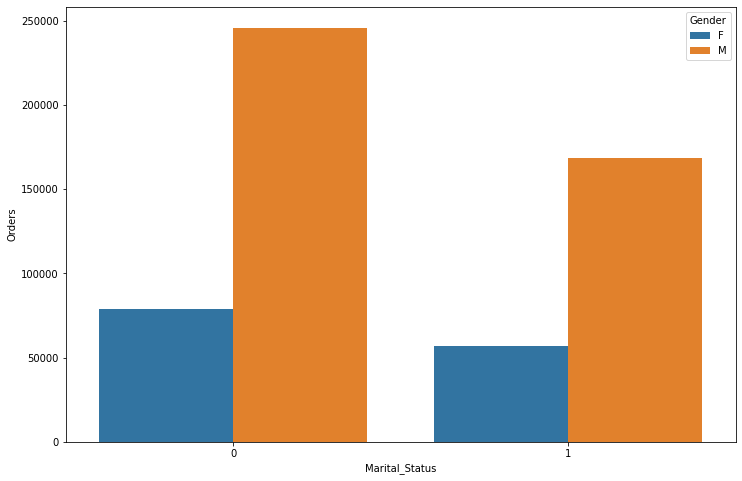

In [236]:
sns.barplot(x="Marital_Status",y="Orders", hue="Gender",data=df_gender_marital_Status)

<AxesSubplot:xlabel='Marital_Status', ylabel='Total'>

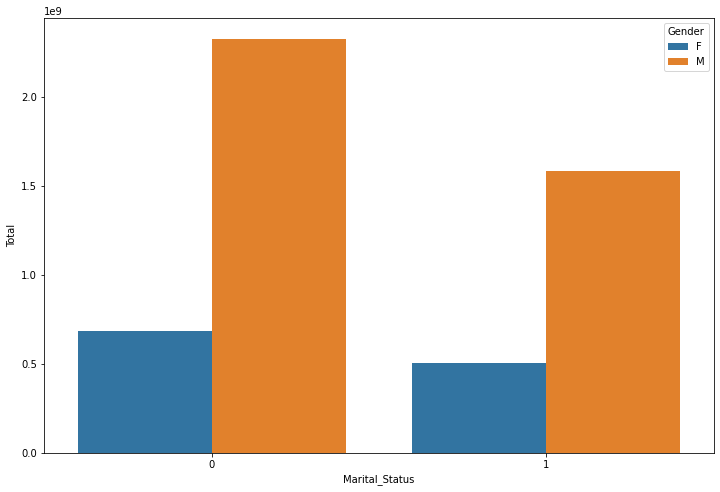

In [237]:
sns.barplot(x="Marital_Status",y="Total", hue="Gender",data=df_gender_marital_Status)

<AxesSubplot:xlabel='Marital_Status', ylabel='Mean'>

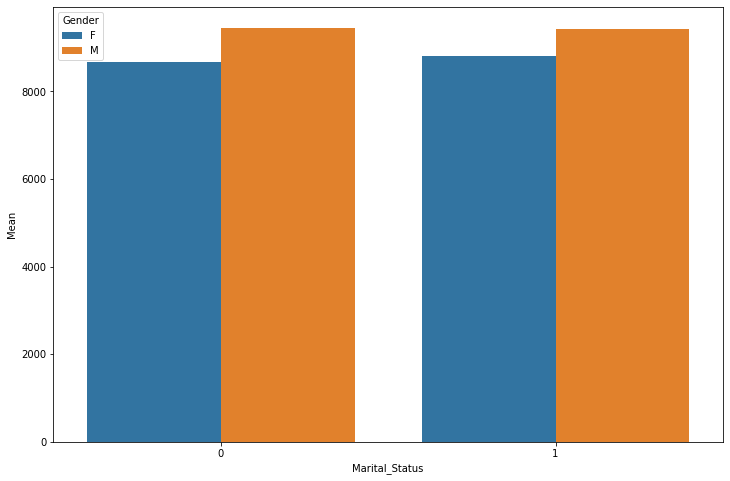

In [238]:
sns.barplot(x="Marital_Status",y="Mean", hue="Gender",data=df_gender_marital_Status)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [240]:
df_city = pd.concat([df.groupby(["City_Category"]).size().reset_index().rename(columns={0:"Orders"}),\
                        df.groupby(["City_Category"])["Purchase"].sum().reset_index().rename(columns={"Purchase":"Total"})["Total"], \
                        df.groupby(["City_Category"])["Purchase"].mean().reset_index().rename(columns={"Purchase":"Mean"})["Mean"].astype(int)],axis=1)


([<matplotlib.patches.Wedge at 0x21c0c422940>,
 [Text(0.7411686510716765, 0.8330030196035256, 'A'),
  Text(-1.1396971659940778, 0.1535915682095465, 'B'),
  Text(0.6428389878933528, -0.9535502271219121, 'C')],
 [Text(0.40880602727271836, 0.4594590646243661, '26.85%'),
  Text(-0.6441766590401309, 0.08681262550974365, '42.03%'),
  Text(0.363343775765808, -0.5389631718515154, '31.12%')])

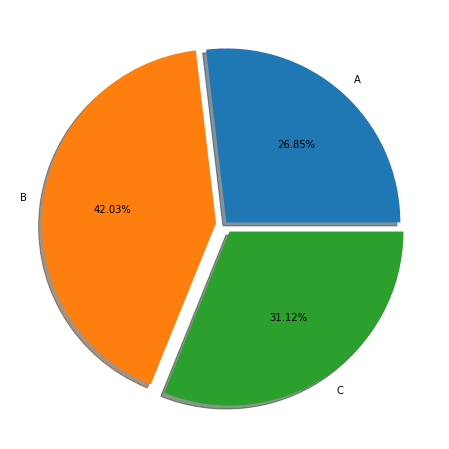

In [253]:
plt.pie(labels="City_Category",x="Orders",data=df_city,autopct="%1.2f%%",shadow=True,explode=[0.015,0.05,.05])

In [255]:
df_stayincity = pd.concat([df.groupby(["Stay_In_Current_City_Years"]).size().reset_index().rename(columns={0:"Orders"}),\
                        df.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().reset_index().rename(columns={"Purchase":"Total"})["Total"], \
                        df.groupby(["Stay_In_Current_City_Years"])["Purchase"].mean().reset_index().rename(columns={"Purchase":"Mean"})["Mean"].astype(int)],axis=1)


In [256]:
df_stayincity

,Stay_In_Current_City_Years,Orders,Total,Mean
0,0,74398,682979229,9180
1,1,193821,1792872533,9250
2,2,101838,949173931,9320
3,3,95285,884902659,9286
4,4+,84726,785884390,9275


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Orders'>

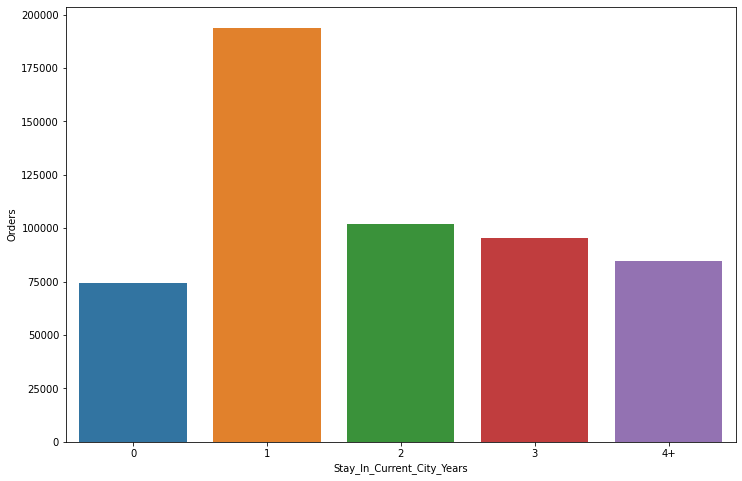

In [262]:
sns.barplot(x="Stay_In_Current_City_Years",y="Orders",data=df_stayincity)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [271]:
df_topproducts = df.groupby(["Product_Category_1"]).size().reset_index().rename(columns={0:"Orders"}).sort_values(ascending=False,by="Orders")


In [272]:
df_topproducts[:11]

,Product_Category_1,Orders
4,5,150933
0,1,140378
7,8,113925
10,11,24287
1,2,23864
5,6,20466
2,3,20213
3,4,11753
15,16,9828
14,15,6290


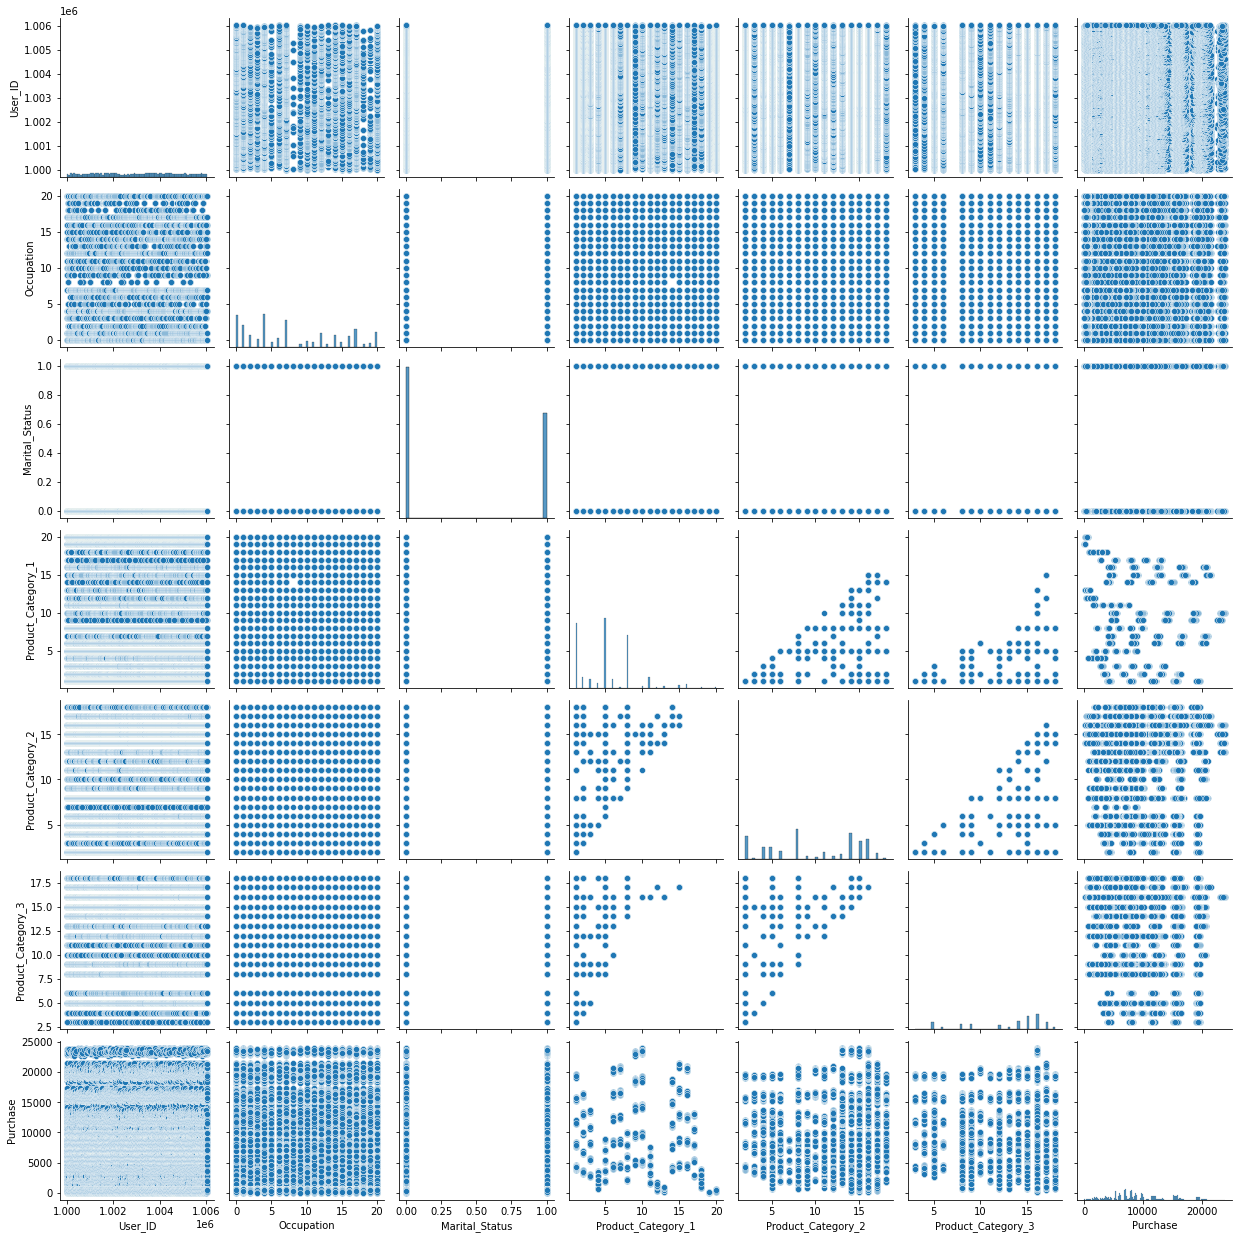

In [273]:
## Pair Plots
sns.pairplot(df)